# Salary Prediction

Corresponding  with this notebook is a slide deck where you will need to update all the portions in red.  Completing the notebook will provide all the results needed for the slides.  **Correctly completing the slides is a required part of the project.**


## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Regression](#regression)
- [Part III - Interpret Results](#interpret)


<a id='intro'></a>
### Introduction

Linear Regression is very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of a Linear Regression model associated with salaries.  Your goal is to work through this notebook to understand what variables are related to salary, and how exactly they are related.

As a final check, assure you meet all the criteria on the rubric.

<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import display, HTML
random.seed(0)

import warnings
warnings.filterwarnings("ignore") 


CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

For each of the parts of question `1` notice links to [pandas documentation](https://pandas.pydata.org/) is provided to assist with answering the questions.  Though there are other ways you could solve the questions, the documentation is provided to assist you with one fast way to find the answer to each question.


`1.a)` Now, read in the `salary_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here. **This question is completed for you**:

In [2]:
#importing the dataset
df = pd.read_csv('salary_data.csv')

#create a copy of my dataset
data = df

#displaying the dataset
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


`b)` Use the below cell to find the number of rows in the dataset. [Helpful pandas link - `Dataframe.shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape)

In [3]:
#show the number of rows .. shape display rows and columns 0 for rows and 1 for columns
print("The number of rows in the dataset: {}".format(df.shape[0]))

The number of rows in the dataset: 375


`c)` Do any of the rows have missing values? [Helpful Pandas Link One](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) and [Helpful Pandas Link Two](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)  

If there are missing values, determine a method for dealing with them.

**`I got rid of the missing values because the NaN values are across all the columns of the dataframe.`**

In [4]:
#to measure the missing values, I have used isna() function
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [5]:
df[df["Age"].isnull() == True] # I can delete these two rows

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df[df["Age"].isnull() == False] # keep non-nan values

In [7]:
df.shape #the dataset is free from NA values

(373, 6)

`d)` How many employees are in each `Education Level`? Build a bar chart to show the count of employees in each level.

In [8]:
#I wanted to see the unique values in the Education Level col.
education_counts = df["Education Level"].value_counts()

for level, count in education_counts.items():
    print("The number of employees in the Education Level - '{}' is: {}".format(level, count))

The number of employees in the Education Level - 'Bachelor's' is: 224
The number of employees in the Education Level - 'Master's' is: 98
The number of employees in the Education Level - 'PhD' is: 51


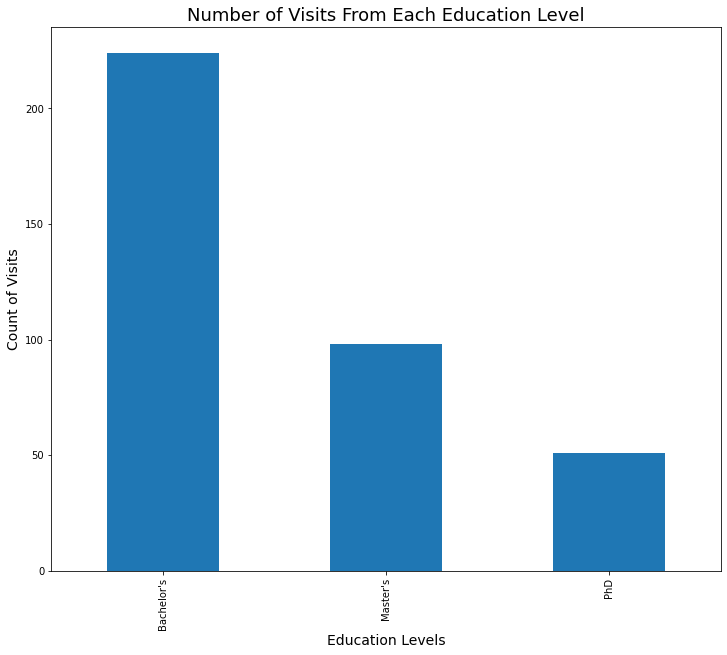

In [9]:
# bar chart of results - this part is done for you
plt.figure(figsize=(12,10),facecolor="w")
df['Education Level'].value_counts().plot(kind='bar') 
plt.title('Number of Visits From Each Education Level',fontsize=18)
plt.ylabel('Count of Visits',fontsize=14)
plt.xlabel("Education Levels",fontsize=14)
plt.show()

`e)` What are the possible values for `Salary`?  What does the distribution of `Salary` look like?

**`Salary distribution goes between around 50k to slightly beyond 200k, as you can see in the next two visuals (Histogram and Box plot) however I wanna emphasize that there're a potential of outliers regarding this variable and requires some attention in the future investigation.`**

**`The Salary looks like a right-skewed visual based on the histogram.`**

In [10]:
#Statistical calculations
Q1,Q3 = np.percentile(df['Salary'],[25,75])
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR
Range = (df['Salary'].max()-df['Salary'].min())
print("The 25% percentile = {}\nThe 75% percentile = {}\nThe IQR = {}\nThe Upper Bound = {}\nThe Lower Bound = {}\nThe Range of Salary = {}".format(Q1,Q3,IQR,lower_bound,upper_bound,Range))

The 25% percentile = 55000.0
The 75% percentile = 140000.0
The IQR = 85000.0
The Upper Bound = -72500.0
The Lower Bound = 267500.0
The Range of Salary = 249650.0


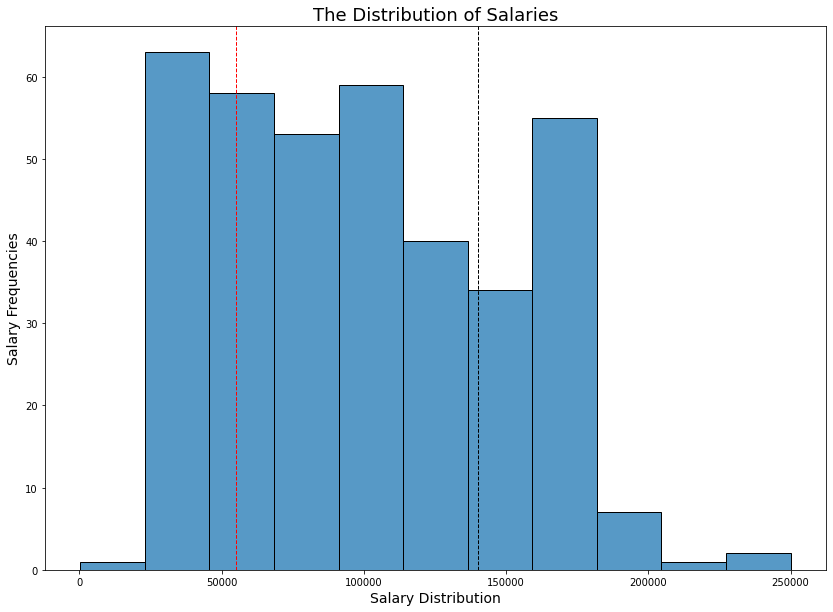

In [11]:
import seaborn as sns
#using Histogram to see the distribution of "Salary"
plt.figure(figsize=(14,10),facecolor="w")
sns.histplot(df.Salary)
plt.title('The Distribution of Salaries',fontsize=18)
plt.axvline(Q1, color='r', linestyle='dashed', linewidth=1) #highlighting the 25% percentile
plt.axvline(Q3, color='k', linestyle='dashed', linewidth=1) #highlighting the 75% percentile
plt.ylabel('Salary Frequencies',fontsize=14)
plt.xlabel("Salary Distribution",fontsize=14)
plt.show()

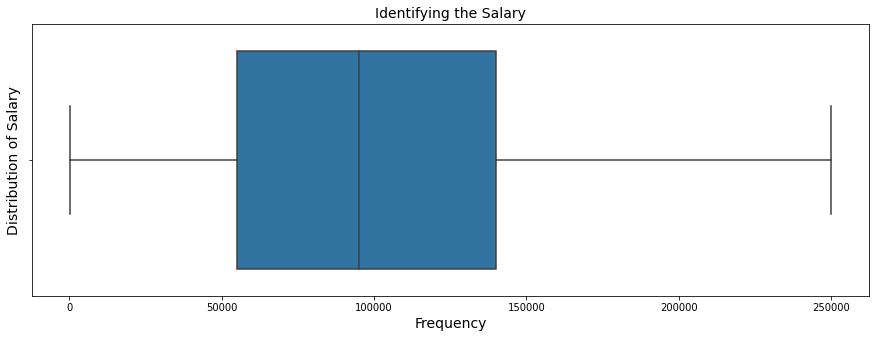

In [12]:
import seaborn as sns

plt.figure(figsize=(15,5),facecolor="w")
sns.boxplot(df["Salary"],orient="h")
plt.title("Identifying the Salary",fontsize=14)
plt.ylabel("Distribution of Salary",fontsize=14)
plt.xlabel("Frequency",fontsize=14)
plt.show()

In [13]:
round(df.Salary.describe(),3) #dig deeper in the "Salary" variable

count       373.000
mean     100577.346
std       48240.013
min         350.000
25%       55000.000
50%       95000.000
75%      140000.000
max      250000.000
Name: Salary, dtype: float64

**`Interpretation`**

- We can see that the right skewed histogram. As the mean is `100577.346` and median is `95000`.
- There is a potential outlier as min value `350` and 25% is `55000` which is a great gap. Might required further investigation.

<a id='regression'></a>
#### Part II - Regression

`1.` Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `Salary`.

`a)` Consider average salary by gender, is there evidence that salaries are higher for one gender over the other?

**`We can see Male has slight advantage over Female with average salary 103,867.784 and 97,011.173 resepectively.`**

In [14]:
# Optimized to avoid redundancy
Gender = ["Male", "Female"]

for gender in Gender:
    filtered_df = df[df["Gender"] == gender]
    if not filtered_df.empty:  # Check if there are matching rows
        mean_salary = filtered_df.groupby("Gender")["Salary"].mean().values[0]
        print(f"The Average Salary by Gender - {filtered_df.values[0][1]}:  {round(mean_salary,3)}")

The Average Salary by Gender - Male:  103867.784
The Average Salary by Gender - Female:  97011.173


`b)` Consider average salary by education level, is there evidence that salaries are higher for increased education?

In [15]:
# Optimized to avoid redundancy
education_levels = ["Bachelor's", "Master's", "PhD"]

for level in education_levels:
    filtered_df = df[df["Education Level"] == level]
    if not filtered_df.empty:  # Check if there are matching rows
        mean_salary = filtered_df.groupby("Education Level")["Salary"].mean().values[0]
        print(f"Average Salary per Education Level - {filtered_df.values[0][2]}:  {round(mean_salary,3)}")

Average Salary per Education Level - Bachelor's:  74756.027
Average Salary per Education Level - Master's:  129795.918
Average Salary per Education Level - PhD:  157843.137


`c)` Consider average salary by years of experience, is there evidence that salaries are associated with increased years of experience?

**`That's true because in the next detailed table, we can compare between 0 YOE and 20 YOE salaries.`**

I have constructed a nice bar plot with bandwidth if we categorize the YOE on a scale per 5 years each we can clearly see that the average salary between `Less than 5 YOE` and More than `15 YOE` are giganitc on scale.

In [16]:
df["Years of Experience"].value_counts()

df.groupby('Years of Experience')['Salary'].mean().to_frame().reset_index() #yes indeed

,Years of Experience,Salary
0,0.0,33333.333333
1,0.5,35000.000000
2,1.0,37857.142857
3,1.5,36279.166667
4,2.0,41774.193548
5,3.0,51166.666667
6,4.0,58500.000000
7,5.0,64117.647059
8,6.0,83750.000000
9,7.0,84444.444444


**`Creating a subset to highlight the total salary of the employees based on their YOE. if the employee has less than 5 years of experience his avg. salary is around 52.5k compared to someone with YOE in range of (15-20 YOE)`**

In [17]:
#starting with defining the bins and labels
bins = [0, 6, 11, 16,21]
labels = ["Less than 5 YOE","5-10 YOE","10-15 YOE","15-20 YOE"]
df["YOE_label"] = pd.cut(df['Years of Experience'], bins=bins, labels=labels)

#creating a small subset out of df 
subset = df.groupby('YOE_label')['Salary'].mean().to_frame().reset_index() #yes indeed

,YOE_label,Salary
0,Less than 5 YOE,52541.153846
1,5-10 YOE,94569.892473
2,10-15 YOE,130342.465753
3,15-20 YOE,162881.355932


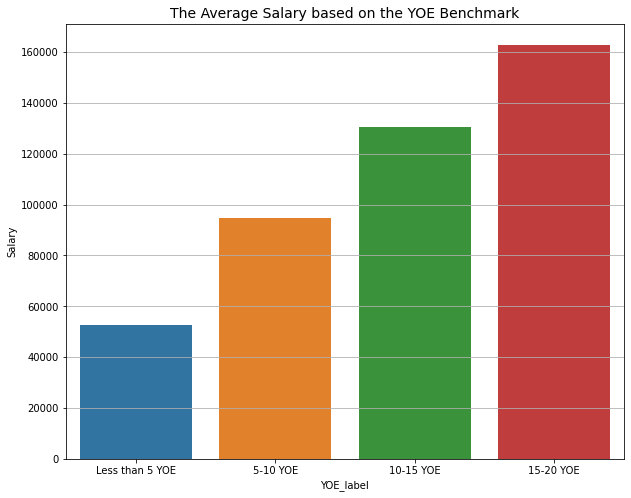

In [18]:
#creating bar plot and visualizing the subset table for easy comparison
from IPython.display import display, HTML

display(subset)

plt.figure(figsize=(10,8))
sns.barplot(subset.YOE_label,subset.Salary)
plt.title("The Average Salary based on the YOE Benchmark",fontsize=14)
plt.grid(axis='y')
plt.show()

`d)`  To make use of Job Title column lets create bool flag based on word existiance


List of words:

* Director
* Junior
* Senior
* Manager
* Analyst
* Engineer

**This question is completed for you**

In [19]:
flag_words = ['director', 'junior', 'senior', 'manager', 'analyst', 'engineer']

rankings = {
    'director':5,
    'manager':4,
    'senior':3,
    'engineer':2,
    'analyst':1,
    'junior':0
}

# Convert job titles to lowercase for consistency
df['Job Title'] = df['Job Title'].str.lower()
# Initialize columns for each word in flag_words and assign ranks
for word in flag_words:
    # Create a column to indicate the presence of the word
    df[word] = df['Job Title'].str.contains(word)
    
    # Create a ranking column for each word (if the word is present, assign its rank)
    df[word] = df[word].apply(lambda x: rankings[word] if pd.notna(x) and x else 0).astype("int64")

#
condition = df[['director','junior','senior','manager','analyst','engineer']]

In [20]:
# Iterate over rows
for index, row in condition.iterrows():
    if (row > 0).any():  # If any number > 0
        max_col = row.idxmax()  # Find the column with the highest number
        condition.loc[index] = 0  # Set all values to 0
        condition.loc[index, max_col] = 1  # Set the highest value column to 1
    elif (row == 0).all():  # If all values are 0
        condition.loc[index, 'not listed'] = 1  # Set 'not listed' column to 1
    else:
        condition.loc[index, 'not listed'] = 0  # Ensure 'not listed' is 0 if not all are 0
condition['not listed'] = condition['not listed'].fillna(0).astype("int64")

#displaying the results:
condition.columns = condition.columns.str.title()#del unnecessary var.
df = pd.concat([df,condition],axis=1)

df.drop(['director', 'junior', 'senior', 'manager', 'analyst', 'engineer'],axis=1,inplace=True)

`e)` Create a flag for gender where 1 is if a person is male and 0 if the person is not.

In [21]:
#get_dummies
df[["Male","Female"]] = pd.get_dummies(df["Gender"])

In [22]:
# Data Transformation
#changing the dtype ## Years of Experience is float and that's the correct dtype
df["Age"] = df["Age"].astype("int64")
df["Salary"] = df["Salary"].astype("int64")


In [23]:
#df.info()
# .replace({False: 0, True: 1}, inplace=True)

for i in df.columns:
    if df[i].dtype == "bool":
        df[i] = df[i].replace({False: 0, True: 1})


In [24]:
df[["Bachelor","Master","PhD"]] = pd.get_dummies(df["Education Level"])

In [25]:
#delete original columns
df.drop(["Gender","Education Level"],axis=1,inplace=True)

`f)` Use statsmodels to fit a linear model to predict salary using each of the features from `a-e`.  These include:
* Gender
* Job TItle
* Years of Experience
* Education

**`In the next model, I have included all the variables without deleting any elements at all, that's because I want to elemeinate in the following step the elements that doesn't impact significantly on the *Salary* variable.`**

In [26]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

df['intercept'] = 1
mlr = sm.OLS(df['Salary'],df[['intercept', 'Years of Experience','Director',
       'Junior', 'Senior', 'Manager', 'Analyst', 'Engineer', 'Not Listed',
       'Male', 'Female', 'Bachelor', 'Master', 'PhD']])

res = mlr.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     397.3
Date:                Mon, 20 Jan 2025   Prob (F-statistic):          6.14e-182
Time:                        23:34:14   Log-Likelihood:                -4106.5
No. Observations:                 373   AIC:                             8233.
Df Residuals:                     363   BIC:                             8272.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept             2.63e+04   1286.236     20.449      0.000    2.38e+04    2.88e+04
Years of Experience  5275.8443    182.331     28.935      0.000    4917.286    5634.402
Director             1.864e+04   2985.772      6.243      0.000    1.28e+04    2.45e+04
Junior                6.49e-12   6.13e-13     10.579      0.000    5.28e-12     7.7e-12
Senior               8714.1424   1788.962      4.871      0.000    5196.111    1.22e+04
Manager              6682.0247   1817.875      3.676      0.000    3107.135    1.03e+04
Analyst             -6342.0452   2504.229     -2.533      0.012   -1.13e+04   -1417.428
Engineer             1538.2390   5691.969      0.270      0.787   -9655.135    1.27e+04
Not Listed          -2930.4936   1913.362     -1.532      0.126   -6693.159     832.172
Male                 9335.2540   1031.444      9.051      0.000    7306.899    1.14e+04
Female               1.697e+04    989.101     17.154      0.000     1.5e+04    1.89e+04
Bachelor            -3738.8315   1227.999     -3.045      0.002   -6153.717   -1323.947
Master               1.039e+04   1378.591      7.535      0.000    7676.437    1.31e+04
PhD                  1.965e+04   2016.399      9.747      0.000    1.57e+04    2.36e+04
==============================================================================
Omnibus:                       87.567   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.357
Skew:                           0.848   Prob(JB):                    4.49e-108
Kurtosis:                       8.379   Cond. No.                     2.86e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.6e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Interpretation:

**`Due to the multicollinearity and filtering only the variables that impact significantly on the Salary variable, our dependent response. We can say:`**

1. Years of Experience
2. Director
3. Junior
4. Senior
5. Manager
6. Engineer "We keeping it because we need to use this variable to answer the `Q(d)` in `Part III` `If a male employee has 5 years of experience as a senior engineer with a bachelor's degree, what is the expected salary of the employee?`"
7. Male
8. Bachelor
9. PhD


*Despite Female & Master degree both have p-value less than the critical value `0.05`, however we eliminate them to avoid multicollinearity.*

*Omitted `Analyst` because when I included in the next regression model, the p-value = `0.206`*

<a id='interpretation'></a>
### Part III - Interpret Results

`1.` Consider you are tasked with finding which features in your linear model are significantly related to salary.  Were there any features that were not significantly related to salary in your first model?  If not, remove those features and fit a new model.  Only keep the features that were significant from the original model.

In [27]:
# explain your answer and fit a new model with the reduced set of features here
mlr0 = sm.OLS(df['Salary'],df[['intercept' , 'Years of Experience','Director',
       'Senior', 'Manager', 'Engineer', 'Male', 'Bachelor', 'PhD']])

res0 = mlr0.fit()
res0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     446.3
Date:                Mon, 20 Jan 2025   Prob (F-statistic):          5.59e-183
Time:                        23:34:14   Log-Likelihood:                -4107.2
No. Observations:                 373   AIC:                             8232.
Df Residuals:                     364   BIC:                             8268.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept             4.97e+04   2704.941     18.373      0.000    4.44e+04     5.5e+04
Years of Experience  5279.4547    182.400     28.944      0.000    4920.765    5638.144
Director             2.245e+04   3746.305      5.993      0.000    1.51e+04    2.98e+04
Senior               1.256e+04   2271.826      5.531      0.000    8096.803     1.7e+04
Manager              1.057e+04   2209.459      4.782      0.000    6221.066    1.49e+04
Engineer             5499.5734   6835.131      0.805      0.422   -7941.729    1.89e+04
Male                -7464.2121   1553.089     -4.806      0.000   -1.05e+04   -4410.059
Bachelor            -1.419e+04   2122.097     -6.689      0.000   -1.84e+04      -1e+04
PhD                  9301.5060   2818.488      3.300      0.001    3758.942    1.48e+04
==============================================================================
Omnibus:                       91.739   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.852
Skew:                           0.879   Prob(JB):                    6.58e-120
Kurtosis:                       8.677   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`a)` With each additional year of experience, what is the expected change in salary?  What is the 95% confidence interval of the change?

**Your Answer Here**

>  The expected change in salary is: `49700`

>  The 95% confidence interval of the change is between `44400` and `55000`. Which the true coefficient likely falls, with a certain level of 95% confidence interval.

`b)` What is the expected difference in salary between someone with a senior title and someone with none of the other title indications?

**Your Answer Here**

>  `Senior` position: `12560.42`

The coefficient for Senior is 12,560.42, which means that holding a senior title is associated with an expected increase of 12,560.42 in salary compared to someone without any of the title indications (i.e., the baseline group, represented by the intercept). If an individual has a senior title and none of the other title indicators (e.g., Director, Manager, Engineer, etc.), their expected salary would be 12,560.42 higher compared to someone without any title.

`c)` What is the expected difference in salary between someone with a PhD and an individual with no PhD nor master's degree?  What is the 95% confidence interval of the change?

**Your Answer Here**

>  `PhD` position: `9301`

>  `Bachelor` position: `-14,190`

The coefficient for PhD is 9301.50, meaning that having a PhD increases the expected salary by 9,301.51 compared to someone without a PhD.

The coefficient for Bachelor (representing individuals with no master's degree) is -14,191.04, meaning that having only a bachelor's degree (compared to the reference group, likely those with a master's degree) decreases the expected salary by 14,191.04.

**`95% Confidence Interval`**
The 95% confidence interval for Bachelor is: [-18400,-10000]

The 95% confidence interval for PhD is: [3758.94,14800]

**`The 95% confidence interval of the change:`**

[3758.94 - (-18400), 14800 - (-10000)] = [3758.94+18400 , 14800+10000] = `[22158.94, 24844.08]`

`d)` If a male employee has 5 years of experience as a senior engineer with a bachelor's degree, what is the expected salary of the employee?

**Your Answer Here**

>  The Expected Salary is computed as follows:

>  Salary = Intercept + YOE $\beta$ + Age $\beta$ + Job Title $\beta$ + Gender $\beta$ + Education $\beta$

>  **`Parameters for the case:`**

* Intercept: 49700
* YOE: 5287.45
* Job Title:
    * a. Engineer: 5499.57
    * b. Senior: 12560
* Male: -7464.21
* Bachelor: -14190

`Calculating the expected salary: down below:`


In [28]:
#using the intercept to compute the salary
Salary = (49700+(5*5287.45)+5499.57+12560-7464.21-14190)
print("The expected salary of the employee is: {}$".format(round(Salary,2)))

The expected salary of the employee is: 72542.61$


`e)` Imagine that the employee in question `d)` actually has a salary of $110,000, what would the residual be for this employee?

**`Is considered identical which is a bit suspecious!`**

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

subset = df[(df["Salary"] == 110000)]

# Split data into features (X) and target (y)
X = subset[['Years of Experience', 'Senior', 'Engineer','Male','Bachelor']]
y = subset['Salary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2:.2f}") #above 80%-90% is considered good!

R-squared: 1.00


**`Computing the same caculation on the whole data to measure the R2`**

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features (X) and target (y)
X = df[['Years of Experience', 'Senior', 'Engineer','Male','Bachelor']]
y = df['Salary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2:.2f}") #above 80%-90% is considered good!

R-squared: 0.91


**Your Answer Here**

>  When I filter the data with the a condition of employee earns `110k` the R2 score is `100%` and it's biased.

>  On the other hand, when I train the same calculations on the whole dataset, I get reasonable R2 score `91%`.

`f)` How well do you think your model fits?  What metrics or plots would you consider to understand if this model does a good job of predicting salary?

**Your Answer Here**

I will focus on `heatmap` and `scatter matrix` to give me clearer prospect on the variables and their correlation with the salary. Both visuals help in understanding the model fits or not and give valuable insights regarding the predicting salary.

Furthermore, most independent variables have p-values < 0.05, indicating they are statistically significant in predicting salary. 

Finally, The R2 score suggests that 91% of the variance in salary is explained by the independent variables in the model.

In [31]:
### Your work here
lr = df[['Years of Experience','Director', 'Salary', 'Age',
       'Senior', 'Not Listed', 'Manager','Engineer', 'Male', 'Bachelor', 'PhD']]

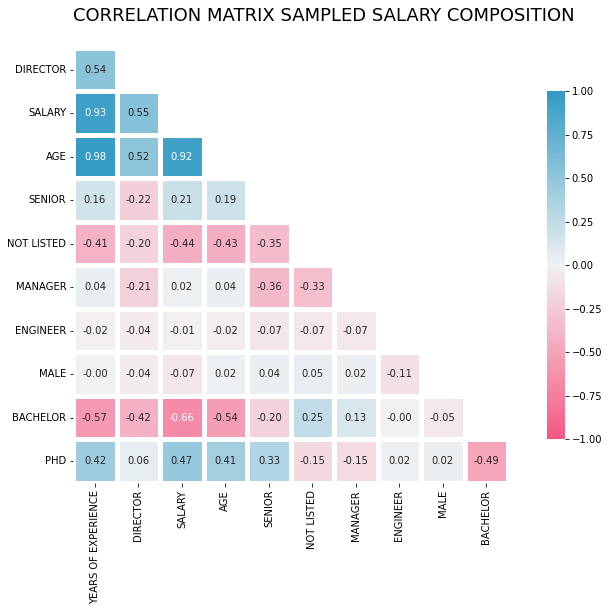

In [32]:
fig, ax = plt.subplots(figsize=(14, 8))

df_corr = lr.corr()

# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'CORRELATION MATRIX SAMPLED SALARY COMPOSITION\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

<Figure size 720x576 with 0 Axes>

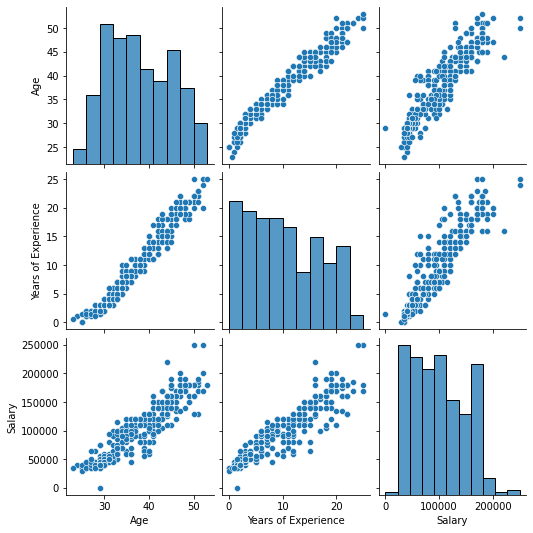

In [33]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.pairplot(data)
plt.show()

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the salary prediction project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your notebook to make sure that it satisfies all the specifications mentioned in the rubric. You should also probably remove all of the "Hints" and "Tips" like this one so that the presentation is as polished as possible.


<a id='submission'></a>
## Submission

Please follow the directions in the classroom to submit this notebook, as well as your completed slides.